In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
schools = pd.read_csv("data/schools.csv")
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
School ID          170 non-null int64
School Name        170 non-null object
Street Address     170 non-null object
City               170 non-null object
State              170 non-null object
ZIP Code           170 non-null int64
Phone Number       170 non-null object
School State ID    170 non-null int64
School Level       170 non-null object
Lowest Grade       170 non-null object
Highest Grade      170 non-null object
Latitude           170 non-null float64
Longitude          170 non-null float64
School Website     170 non-null object
Cluster            107 non-null object
Mapped Location    170 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 21.3+ KB


In [3]:
# Read in the services district shapefile and look at the first few rows.
service_district = gpd.read_file('data/school_districts.geojson.txt')
service_district.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-86.77136400034288 36.3835669997190...
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,(POLYGON ((-86.75364713283636 36.4042760799855...
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,(POLYGON ((-86.76696199971282 36.0833250002130...
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,(POLYGON ((-86.5809831462547 36.20934685360503...
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,(POLYGON ((-86.97287099971373 36.2082789997189...


## Color map
- When you want to differentiate regions, but not imply any type of relationship between the regions, a qualitative colormap is the best choice. In this exercise you'll compare a qualitative colormap to a sequential (quantitative) colormap using the school districts GeoDataFrame. It is available in your workspace as school_districts.

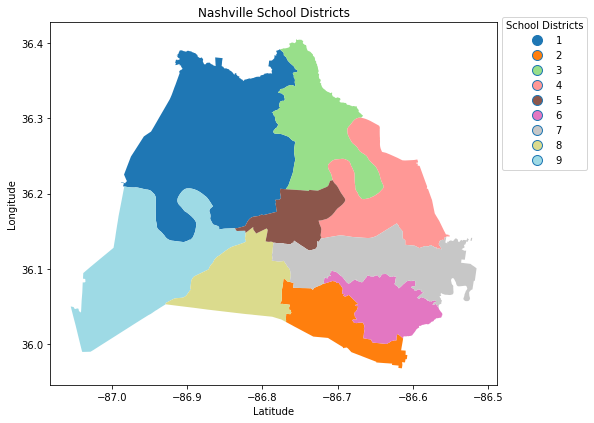

In [4]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
service_district.plot(column = 'district', cmap = 'tab20', legend = True, 
                      legend_kwds = lgnd_kwds, figsize=(8,8))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show()

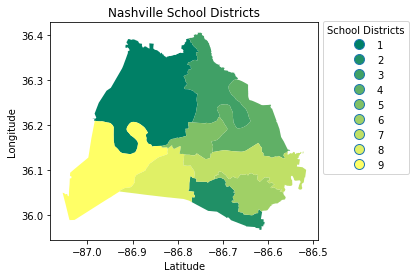

In [5]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
service_district.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

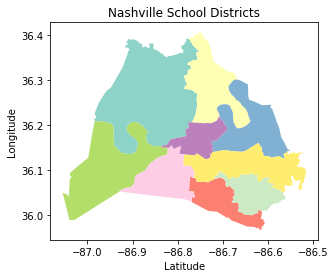

In [6]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
service_district.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nashville School Districts')
plt.show();

## Map Nashville neighborhoods
- This time you'll read a GeoJSON file in to a GeoDataFrame to take a quick peek at where Nashville neighborhoods are.

                   name                                           geometry
0  Historic Buena Vista  (POLYGON ((-86.79511056795417 36.1757596496334...
1        Charlotte Park  (POLYGON ((-86.87459668651866 36.1575770268129...
2              Hillwood  (POLYGON ((-86.87613708067906 36.1355409894979...
3            West Meade  (POLYGON ((-86.9038380396094 36.1255414807897,...
4          White Bridge  (POLYGON ((-86.86321427797685 36.1288622289404...


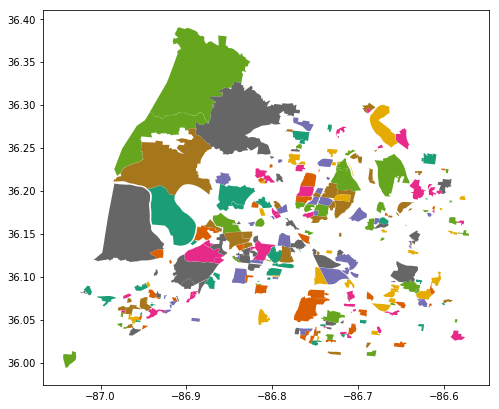

In [7]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file("data/neighborhoods.geojson.txt")

# Print the first few rows of neighborhoods
print(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2', figsize = (8,8))

# Show the plot.
plt.show()

## Changing coordinate reference systems
- In this exercise you will learn how to find a GeoDataFrame's coordinate reference system and how to change it. The school districts GeoDataFrame is available in your workspace as school_districts

In [8]:
# Print the first row of school districts GeoDataFrame and the crs
service_district.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-86.77136400034288 36.3835669997190...


In [9]:
print(service_district.crs)
# Convert the crs to epsg:3857
service_district.geometry = service_district.geometry.to_crs(epsg = 3857)
                        
# Print the first row of school districts GeoDataFrame and the crs again
service_district.head(1)


{'init': 'epsg:4326'}


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,(POLYGON ((-9659344.055955959 4353528.76657080...


In [10]:
service_district.crs

{'init': 'epsg:3857', 'no_defs': True}